# Dataset and Preprocessing

# 2.1 - DATA LOADING

## --- 1

In [125]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## --- 2

In [128]:
from sklearn.model_selection import train_test_split

x_train_splitted, x_val_splitted, y_train_splitted, y_val_splitted = train_test_split(
     x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [129]:
print("Training data shape:", x_train_splitted.shape, "Labels:", y_train_splitted.shape)
print("Validation data shape:", x_val_splitted.shape, "Labels:", y_val_splitted.shape)
print("Test data shape:", x_test.shape, "Labels:", y_test.shape)

Training data shape: (48000, 28, 28) Labels: (48000,)
Validation data shape: (12000, 28, 28) Labels: (12000,)
Test data shape: (10000, 28, 28) Labels: (10000,)


In [130]:
num_classes = len(np.unique(y_train_splitted))
print(num_classes)

class_names = ["T_shirt", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

for i in range(num_classes): # I have done this to show validation is representetive for my training set. (STRATIFY IS WORKING)
     num_samples_4train_i = (y_train_splitted == i).sum()
     num_samples_4val_i = (y_val_splitted == i).sum()

     print("class: {} --- percentage in training: {} --- percentage in validation: {}"
           .format(class_names[i], (num_samples_4train_i / y_train_splitted.shape[0])*100, (num_samples_4val_i / y_val_splitted.shape[0])*100))

10
class: T_shirt --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Trouser --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Pullover --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Dress --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Coat --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Sandal --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Shirt --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Sneaker --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Bag --- percentage in training: 10.0 --- percentage in validation: 10.0
class: Ankle boot --- percentage in training: 10.0 --- percentage in validation: 10.0


## --- 3

In [131]:
print("Training data shape:", x_train_splitted.shape, "Labels:", y_train_splitted.shape)
print("Validation data shape:", x_val_splitted.shape, "Labels:", y_val_splitted.shape)
print("Test data shape:", x_test.shape, "Labels:", y_test.shape)

Training data shape: (48000, 28, 28) Labels: (48000,)
Validation data shape: (12000, 28, 28) Labels: (12000,)
Test data shape: (10000, 28, 28) Labels: (10000,)


# 2.2 - DATA ANALYSIS

## --- 1) Class Distribution:

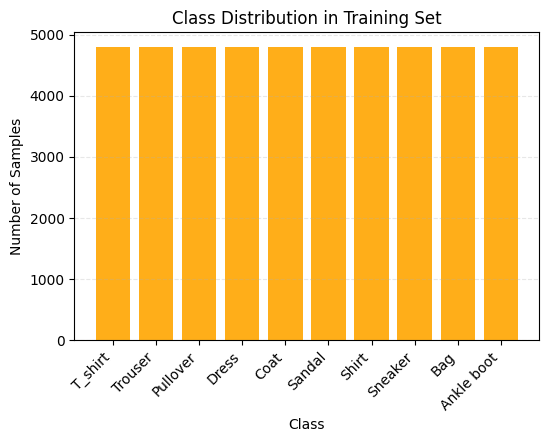

In [132]:
unique, counts = np.unique(y_train_splitted, return_counts=True)

# Plot class Distribution:
plt.figure(figsize=(6, 4))
plt.bar(unique, counts, color="orange", alpha=0.9)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Training Set")
plt.xticks(unique, class_names, rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.show()

## ---2) Pixel Statistics: 

In [133]:
mean = np.mean(x_train_splitted)
std = np.std(x_train_splitted)
print(f"Global Mean of pixel values: {mean:6.2f}\nStandart deviation of pixel values: {std:6.2f}\n\n")

for i in range(num_classes):
     x_train_filtered = x_train_splitted[y_train_splitted == i]
     class_mean = np.mean(x_train_filtered)
     print(f"Class: {class_names[i]:<11} -> Pixels' Mean: {class_mean:6.2f}")

Global Mean of pixel values:  72.99
Standart deviation of pixel values:  90.06


Class: T_shirt     -> Pixels' Mean:  82.85
Class: Trouser     -> Pixels' Mean:  56.99
Class: Pullover    -> Pixels' Mean:  96.49
Class: Dress       -> Pixels' Mean:  66.12
Class: Coat        -> Pixels' Mean:  98.10
Class: Sandal      -> Pixels' Mean:  34.80
Class: Shirt       -> Pixels' Mean:  84.83
Class: Sneaker     -> Pixels' Mean:  42.84
Class: Bag         -> Pixels' Mean:  90.17
Class: Ankle boot  -> Pixels' Mean:  76.76


## ---3) Visualization:

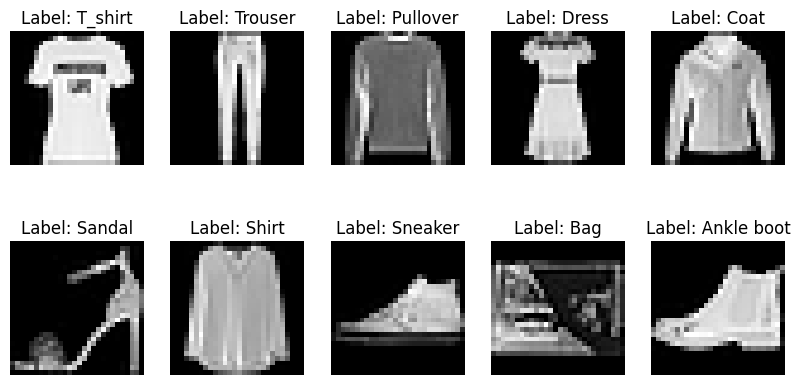

In [134]:
vis_class_number, first_idx = np.unique(y_train_splitted, return_index=True) 
# It will give me the list of indeces of first appearence of each class's member for "first_idx"
# like this: [ 4  9 19  2 17  5  0 10 11  6]
fig, axes = plt.subplots(2,5, figsize=(10,5))
for i, ax in enumerate(axes.flat):
     ax.imshow(x_train_splitted[first_idx[i]], cmap="gray")
     ax.set_title(f"Label: {class_names[i]}")
     ax.axis("off")


# 2.3 - PREPROCESSING

## ---1&2)

In [135]:
print("Mean BEFORE Scikit-Learn normalization: ", np.mean(x_train_splitted))
print("Std BEFORE Scikit-Learn normalization: ", np.std(x_train_splitted))

from sklearn.preprocessing import StandardScaler

# Reshape from 3D to 2D 
x_train_flatten = x_train_splitted.reshape(x_train_splitted.shape[0], -1)
x_val_flatten = x_val_splitted.reshape(x_val_splitted.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flatten)
x_val_scaled = scaler.transform(x_val_flatten)
x_test_scaled = scaler.transform(x_test_flatten)

# Reshape back for original image shape
x_train_scaled = x_train_scaled.reshape(x_train_splitted.shape)
x_val_scaled = x_val_scaled.reshape(x_val_splitted.shape)
x_test_scaled = x_test_scaled.reshape(x_test.shape)

print("\nMean AFTER Scikit-Learn normalization: ", np.mean(x_train_scaled))
print("Std AFTER Scikit-Learn normalization: ", np.std(x_train_scaled))

Mean BEFORE Scikit-Learn normalization:  72.99447648278061
Std BEFORE Scikit-Learn normalization:  90.05933887423916

Mean AFTER Scikit-Learn normalization:  4.2294210461910725e-19
Std AFTER Scikit-Learn normalization:  0.9999999999999882


# k-NN Classifier

# 3.1 - HYPERPARAMETER TUNING

In [140]:
x_train_flatten = x_train_scaled.reshape(x_train_scaled.shape[0], -1)
x_val_flatten = x_val_scaled.reshape(x_val_scaled.shape[0], -1)
x_test_flatten = x_test_scaled.reshape(x_test_scaled.shape[0], -1)

# we want to work with scaled data and they should be in flatten.

In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# candidates for k are 1, 3, 5, 7
k_values = [1, 3, 5, 7]
best_k = None
best_metric = None
best_accuracy = 0
acc_list = []
for k in k_values:

     # to try each metricises 
     for i in range(2):
          myMetric = "euclidean"
          if(i == 1):
               myMetric = "manhattan"


          # Train
          knn = KNeighborsClassifier(n_neighbors=k, metric=myMetric)
          knn.fit(x_train_flatten, y_train_splitted)

          # Evaluate on Val set
          y_val_pred = knn.predict(x_val_flatten)
          val_accuracy = accuracy_score(y_val_splitted, y_val_pred)

          print(f"k={k} | metric= {myMetric} -> Validation Accuracy: {val_accuracy:.4f}")
          acc_list.append(val_accuracy)

          # to choose which one is the best model
          if val_accuracy > best_accuracy:
               best_k = k
               best_metric = myMetric
               best_accuracy = val_accuracy

print(f"\nBest combination k={best_k}, metric={best_metric}, Best Validation Accuracy: {best_accuracy:.4f}")

k=1 | metric= euclidean -> Validation Accuracy: 0.8521
k=1 | metric= manhattan -> Validation Accuracy: 0.8570
k=3 | metric= euclidean -> Validation Accuracy: 0.8553
k=3 | metric= manhattan -> Validation Accuracy: 0.8631
k=5 | metric= euclidean -> Validation Accuracy: 0.8548
k=5 | metric= manhattan -> Validation Accuracy: 0.8661
k=7 | metric= euclidean -> Validation Accuracy: 0.8562
k=7 | metric= manhattan -> Validation Accuracy: 0.8643

Best combination k=5, metric=manhattan, Best Validation Accuracy: 0.8661


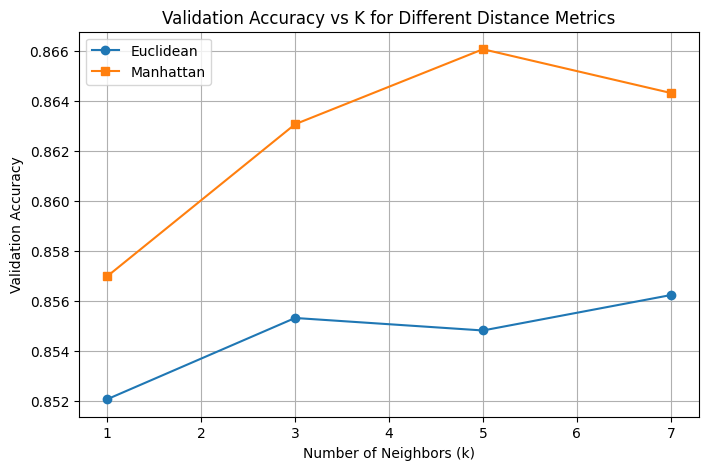

In [145]:
# acc_list: [k=1 euclid, k=1 manhattan, k=3 euclid, k=3 manhattan, ...]

acc_euclid = acc_list[0::2]      # 0, 2, 4, 6 → euclidean 
acc_manhattan = acc_list[1::2]   # 1, 3, 5, 7 → manhattan 

plt.figure(figsize=(8, 5))
plt.plot(k_values, acc_euclid, marker='o', label='Euclidean')
plt.plot(k_values, acc_manhattan, marker='s', label='Manhattan')

plt.title('Validation Accuracy vs K for Different Distance Metrics')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 3.2 - FINAL MODEL

## ---1&2)

In [155]:
import time # it is significant for other part so I have to add it here.

final_knn = KNeighborsClassifier(n_neighbors=5, metric="manhattan")

# Final Training
start_train = time.time()
final_knn.fit(x_train_flatten, y_train_splitted)
end_train = time.time()

from sklearn.metrics import classification_report

# evaluate on test set
start_pred = time.time()
y_test_pred = final_knn.predict(x_test_flatten)
end_pred = time.time()

test_accuracy = accuracy_score(y_test, y_test_pred)

In [153]:
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Test Accuracy with Best Hyperparameters: 0.8561
              precision    recall  f1-score   support

     T_shirt       0.76      0.85      0.80      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.72      0.80      0.76      1000
       Dress       0.90      0.88      0.89      1000
        Coat       0.77      0.75      0.76      1000
      Sandal       0.99      0.89      0.94      1000
       Shirt       0.64      0.57      0.60      1000
     Sneaker       0.90      0.96      0.93      1000
         Bag       0.98      0.93      0.96      1000
  Ankle boot       0.93      0.97      0.95      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Text(0, 0.5, 'True Label')

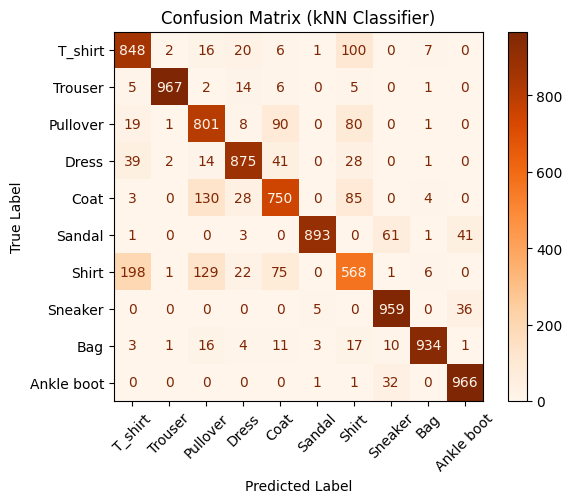

In [154]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_knn = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)

disp.plot(cmap='Oranges', colorbar=True, include_values=True, xticks_rotation=45)
disp.ax_.set_title("Confusion Matrix (kNN Classifier)")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")

The confusion matrix shows that some classes like Trouser, Sneaker, Bag, and Ankle boot are classified with very high accuracy, while others such as Shirt and Coat are more frequently misclassified.
In particular, Shirt is often confused with T-shirt or pullover, indicating visual similarity between these categories.

## ---3)
I observed the times above for final_knn (we can say something about training and prediction time without loss of generality) I will just indicate them here.

In [157]:
print(f"Training time: {end_train - start_train:.4f} seconds")
print(f"Prediction time: {end_pred - start_pred:.4f} seconds")

Training time: 0.0108 seconds
Prediction time: 21.8644 seconds


The k-NN model shows very short training time but longer prediction time.
This is because k-NN is a lazy learner — it does not build a model during training.
Instead, all computations (distance calculations, neighbor selection) happen at prediction time.
As a result, training is fast but prediction becomes slower, especially as the dataset grows.

# Error Analysis

# 4.1

In [162]:
# This is the answer for most confused situations actually. but the question asks most confused class pairs
# so we should examine shirt vs T_shirts for 2 situations
# 1. We predicted as a shirt but they are T_shirts
# 2. We predicted as a T_shirt but they are shirts
# We should add these two numbers to find "most confused class pairs"
"""
confusions = []

for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j: 
            confusions.append((cm_knn[i, j], class_names[i], class_names[j]))

confusions.sort(reverse=True, key=lambda x: x[0])

top3 = confusions[:3]

for val, true_c, pred_c in top3:
    print(f"{true_c} vs {pred_c} → {val} misclassified samples")

"""

confusions = []

for i in range(len(class_names)):
    for j in range(i + 1, len(class_names)):
        total_confusion = cm_knn[i, j] + cm_knn[j, i]
        confusions.append((total_confusion, class_names[i], class_names[j]))

confusions.sort(reverse=True, key=lambda x: x[0])
top3 = confusions[:3]

for val, c1, c2 in top3:
    print(f"{c1} and {c2} = {val} total misclassifications")

T_shirt and Shirt = 298 total misclassifications
Pullover and Coat = 220 total misclassifications
Pullover and Shirt = 209 total misclassifications


# 4.2

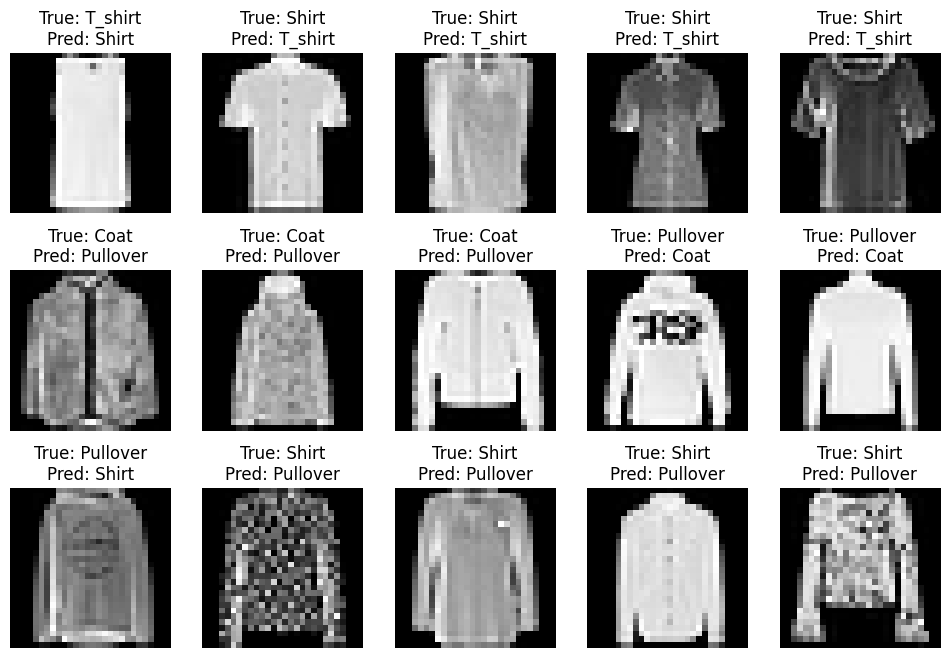

'\nFirstly I dont want to do this part manually. So I want to use my top3 list. But when I determine the indices I dont want to\nspecifically choose one type of mistake like (we predicted t_shirt but it is actually shirt). I want to add the vice versa because of this \ndesire I created my misclassified_idx like that and + or just because of this.\n\nwhy I use this : i%5  => because we dont need to calculate our misclassified example again and again for one type of pair. We need this \ncalculation for each new pairs and these pairs will come in packs of 5. So 0, 5, 10 will be enough to determine whether we calculate \nmisclassified_idx or not.\n\nwhy I use this : myI = i//5 => because I want to look the same top3 index for 5 consecutive items. When I have done with one pack of 5, \nI can continue with the next top3 index. 0,1,2,3,4 => i // 5 = 0          5,6,7,8,9 => i // 5 = 1        10,11,12,13,14 => i // 5 = 2\n'

In [175]:
fig, axes = plt.subplots(3, 5, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
     myI = i // 5
     if (i % 5 == 0):
          misclassified_idx = np.where(
               ( (y_test == class_names.index(top3[myI][1])) & (y_test_pred == class_names.index(top3[myI][2])) ) |
               ( (y_test == class_names.index(top3[myI][2])) & (y_test_pred == class_names.index(top3[myI][1])) ) 
               )[0]
     idx = misclassified_idx[i]
     ax.imshow(x_test[idx], cmap='gray')
     ax.set_title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_test_pred[idx]]}")
     ax.axis("off")
plt.show()

# Afterwards, when I see this project again and this part especially, probably I will say smth past version of myself.
"""
Firstly I dont want to do this part manually. So I want to use my top3 list. But when I determine the indices I dont want to
specifically choose one type of mistake like (we predicted t_shirt but it is actually shirt). I want to add the vice versa because of this 
desire I created my misclassified_idx like that and + or just because of this.

why I use this : i%5  => because we dont need to calculate our misclassified example again and again for one type of pair. We need this 
calculation for each new pairs and these pairs will come in packs of 5. So 0, 5, 10 will be enough to determine whether we calculate 
misclassified_idx or not.

why I use this : myI = i//5 => because I want to look the same top3 index for 5 consecutive items. When I have done with one pack of 5, 
I can continue with the next top3 index. 0,1,2,3,4 => i // 5 = 0          5,6,7,8,9 => i // 5 = 1        10,11,12,13,14 => i // 5 = 2
"""

# 4.3

Most of the mistakes happen between classes that look very similar, such as T-shirt vs. Shirt and Coat vs. Pullover.
These items have almost the same shape and texture, so their grayscale images look very close to each other.

Since the k-NN model compares images based on pixel distances, it has trouble separating classes that only differ in small details like collars, buttons, or fabric patterns.
Because of this, it often mixes these categories when they share a similar overall silhouette.